In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [3]:
# While analyzing the dataset, the column names are not appropriate
# To better understand the data I'll first correct the column names
data.columns = ['States', 'Date', 'Frequency', 'Estimated unemployment rate',
                'Estimated employed', 'Estimated Labour Participation Rate',
                'Region', 'longitude', 'latitude']

In [4]:
data.tail()

,States,Date,Frequency,Estimated unemployment rate,Estimated employed,Estimated Labour Participation Rate,Region,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [5]:
# checking is there any missing values in the dataset
data.isnull().sum()

States                                 0
Date                                   0
Frequency                              0
Estimated unemployment rate            0
Estimated employed                     0
Estimated Labour Participation Rate    0
Region                                 0
longitude                              0
latitude                               0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   States                               267 non-null    object 
 1   Date                                 267 non-null    object 
 2   Frequency                            267 non-null    object 
 3   Estimated unemployment rate          267 non-null    float64
 4   Estimated employed                   267 non-null    int64  
 5   Estimated Labour Participation Rate  267 non-null    float64
 6   Region                               267 non-null    object 
 7   longitude                            267 non-null    float64
 8   latitude                             267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [7]:
data.describe()

,Estimated unemployment rate,Estimated employed,Estimated Labour Participation Rate,longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [8]:
data.corr()

<ipython-input-8-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Estimated unemployment rate,Estimated employed,Estimated Labour Participation Rate,longitude,latitude
Estimated unemployment rate,1.000000,-0.245176,-0.073540,0.149976,-0.023976
Estimated employed,-0.245176,1.000000,-0.047948,-0.113664,-0.119321
Estimated Labour Participation Rate,-0.073540,-0.047948,1.000000,0.080372,0.397836
longitude,0.149976,-0.113664,0.080372,1.000000,0.125895
latitude,-0.023976,-0.119321,0.397836,0.125895,1.000000


In [9]:
# converting the date column into datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   States                               267 non-null    object        
 1   Date                                 267 non-null    datetime64[ns]
 2   Frequency                            267 non-null    object        
 3   Estimated unemployment rate          267 non-null    float64       
 4   Estimated employed                   267 non-null    int64         
 5   Estimated Labour Participation Rate  267 non-null    float64       
 6   Region                               267 non-null    object        
 7   longitude                            267 non-null    float64       
 8   latitude                             267 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 18.9+ KB


<ipython-input-11-8b6b2bb76155>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-11-8b6b2bb76155>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap = 'magma')


<Axes: >

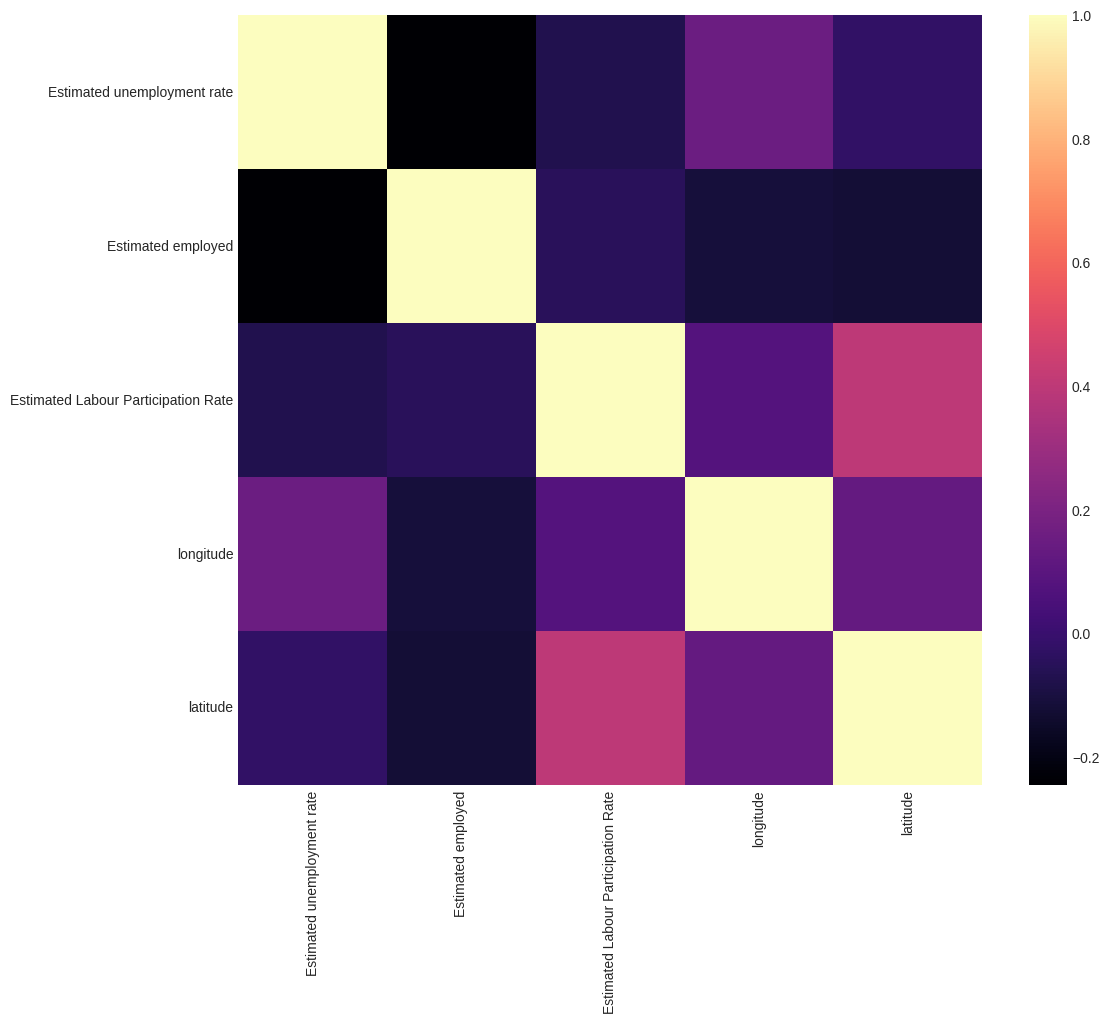

In [11]:
# correlation
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cmap = 'magma')

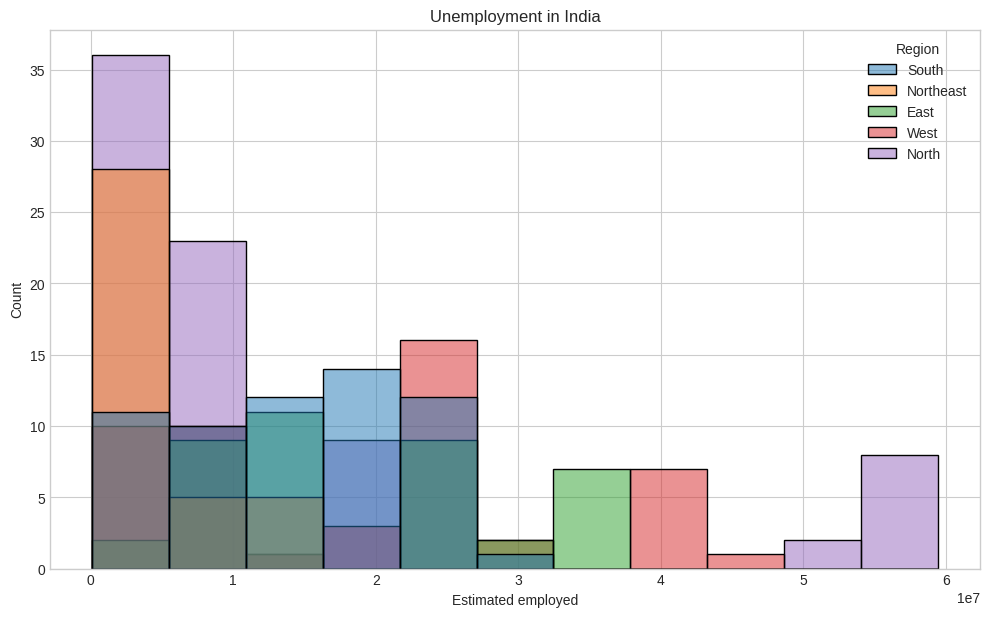

In [12]:
# Estimated No. employees by region
plt.figure(figsize = (12,7))
plt.title("Unemployment in India")
sns.histplot(x = "Estimated employed", hue = "Region", data = data);

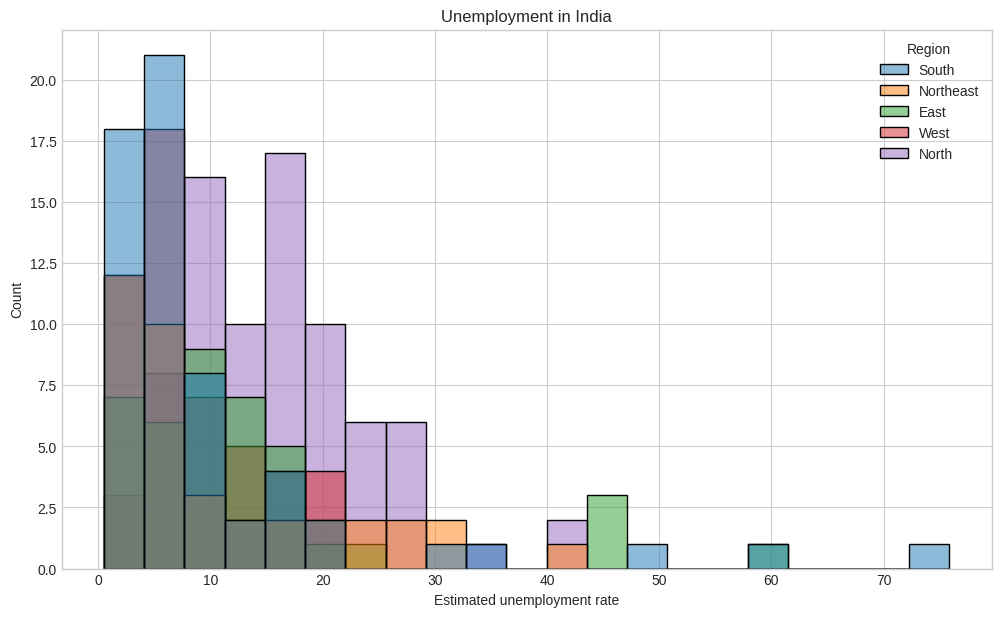

In [13]:
# Estimated unemployment rate Analysis
plt.figure(figsize = (12,7))
plt.title("Unemployment in India")
sns.histplot(x = "Estimated unemployment rate", hue = "Region", data = data);

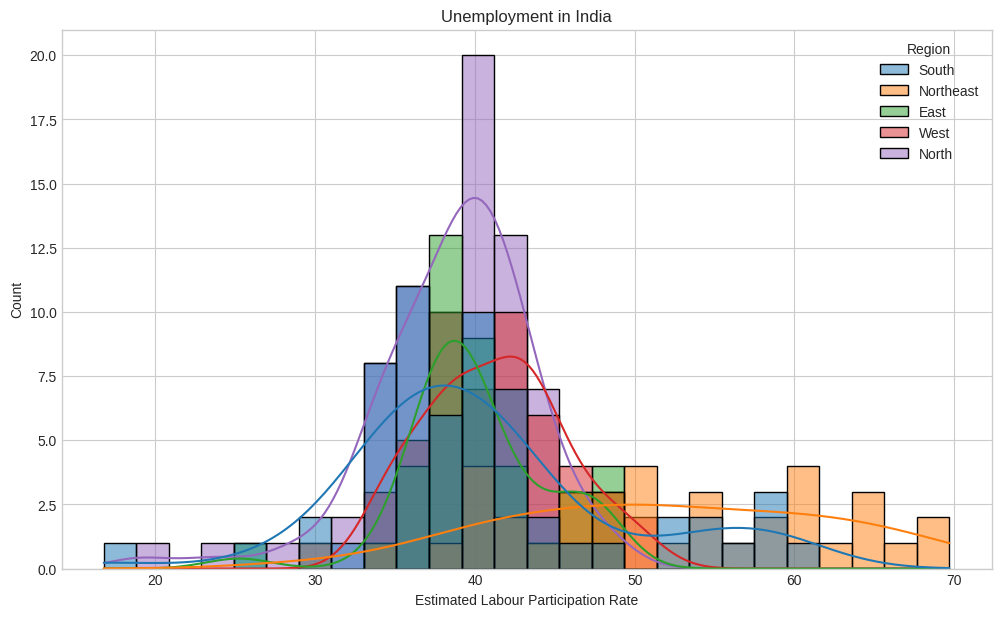

In [14]:
# Estimated Labour Participation Rate Analysis
plt.figure(figsize = (12,7))
plt.title("Unemployment in India")
sns.histplot(x = "Estimated Labour Participation Rate", hue = "Region", kde = True,  data = data);

In [15]:
# To know how many times each states occured in a dataset
data['States'].value_counts()

Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: States, dtype: int64

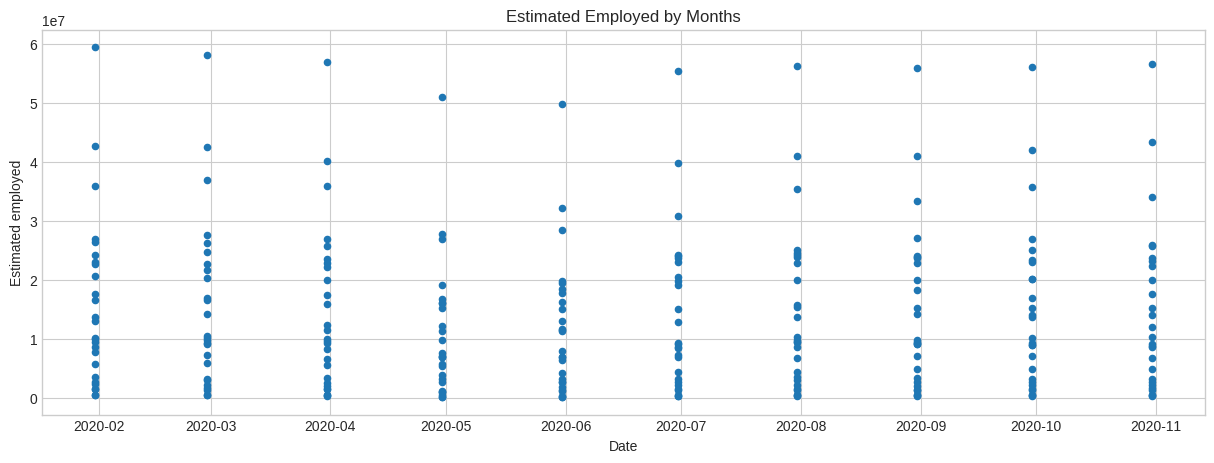

In [16]:
data.plot(kind = 'scatter', x = 'Date', y = 'Estimated employed', figsize = (15,5))
plt.title("Estimated Employed by Months");

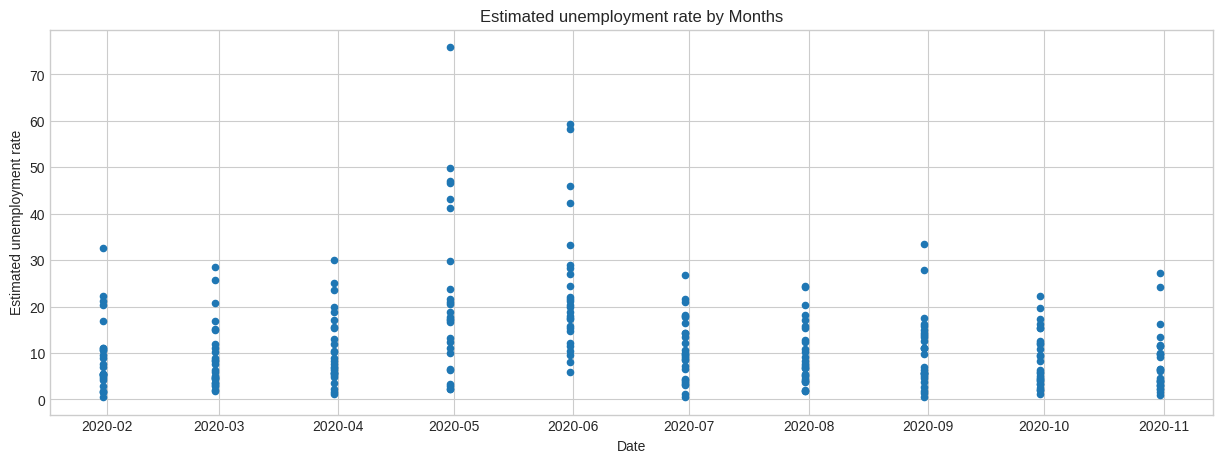

In [17]:
data.plot(kind = 'scatter', x = 'Date', y = 'Estimated unemployment rate', figsize = (15,5))
plt.title("Estimated unemployment rate by Months");

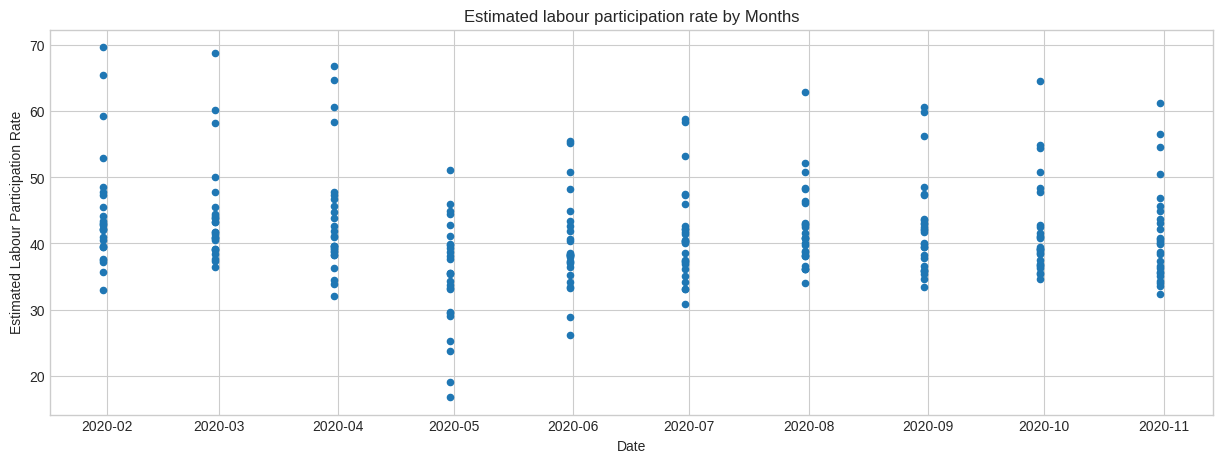

In [18]:
data.plot(kind = 'scatter', x = 'Date', y = 'Estimated Labour Participation Rate', figsize = (15,5))
plt.title("Estimated labour participation rate by Months");

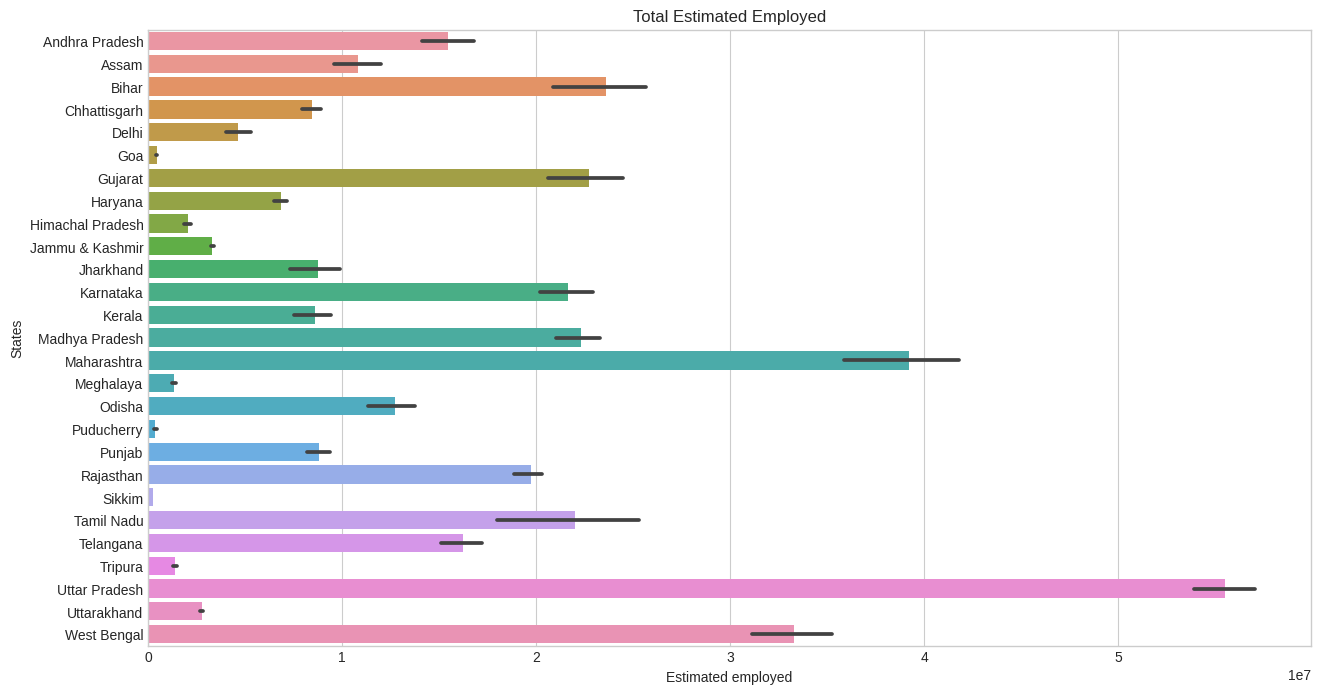

In [28]:
plt.figure(figsize = (15,8))
plt.title("Total Estimated Employed")
sns.barplot(data = data, x = 'Estimated employed', y = 'States');

In [20]:
# Grouping the dataset by regions
grp_region = data.groupby(data['Region']).sum()
grp_region

<ipython-input-20-700016757e2d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grp_region = data.groupby(data['Region']).sum()


,Estimated unemployment rate,Estimated employed,Estimated Labour Participation Rate,longitude,latitude
Region,,,,,
East,556.64,784094676,1604.35,926.4480,3435.4650
North,1255.28,1032726546,3057.51,2343.5248,6088.0468
Northeast,416.11,137450010,1978.10,976.3480,3471.0176
South,627.28,842435360,2426.17,832.6180,4692.0950
West,411.95,931175636,2062.85,1015.6160,3815.5330


In [21]:
# Grouping the dataset by states
grp_states = data.groupby(data['States']).sum()
grp_states

<ipython-input-21-7d365116289d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grp_states = data.groupby(data['States']).sum()


,Estimated unemployment rate,Estimated employed,Estimated Labour Participation Rate,longitude,latitude
States,,,,,
Andhra Pradesh,86.64,154254800,389.62,159.1290,797.4000
Assam,48.56,108102755,434.98,262.0060,929.3760
Bihar,194.71,236068280,371.73,250.9610,853.1310
Chhattisgarh,78.19,84213492,411.61,212.7870,818.6610
Delhi,184.14,46328219,358.57,287.0410,771.0250
Goa,121.67,4423748,392.42,152.9930,741.2400
Gujarat,63.76,227307461,454.90,222.5870,711.9240
Haryana,274.77,68440590,421.00,290.5880,760.8560
Himachal Pradesh,160.65,20338849,402.52,311.0480,771.7340


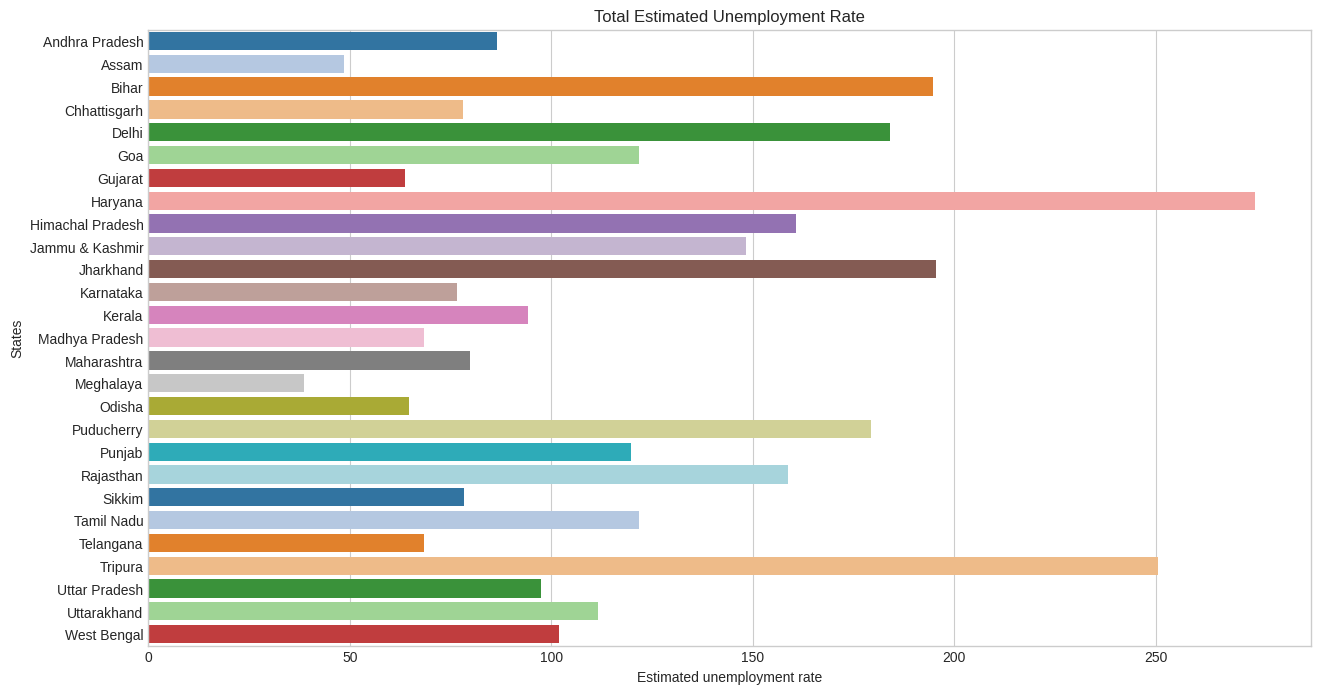

In [22]:
plt.figure(figsize = (15,8))
plt.title("Total Estimated Unemployment Rate")
sns.barplot(data = grp_states, x = 'Estimated unemployment rate', y = grp_states.index, palette = 'tab20');

<Axes: title={'center': 'Total Estimated Unemployment Rate'}, xlabel='Estimated unemployment rate', ylabel='States'>

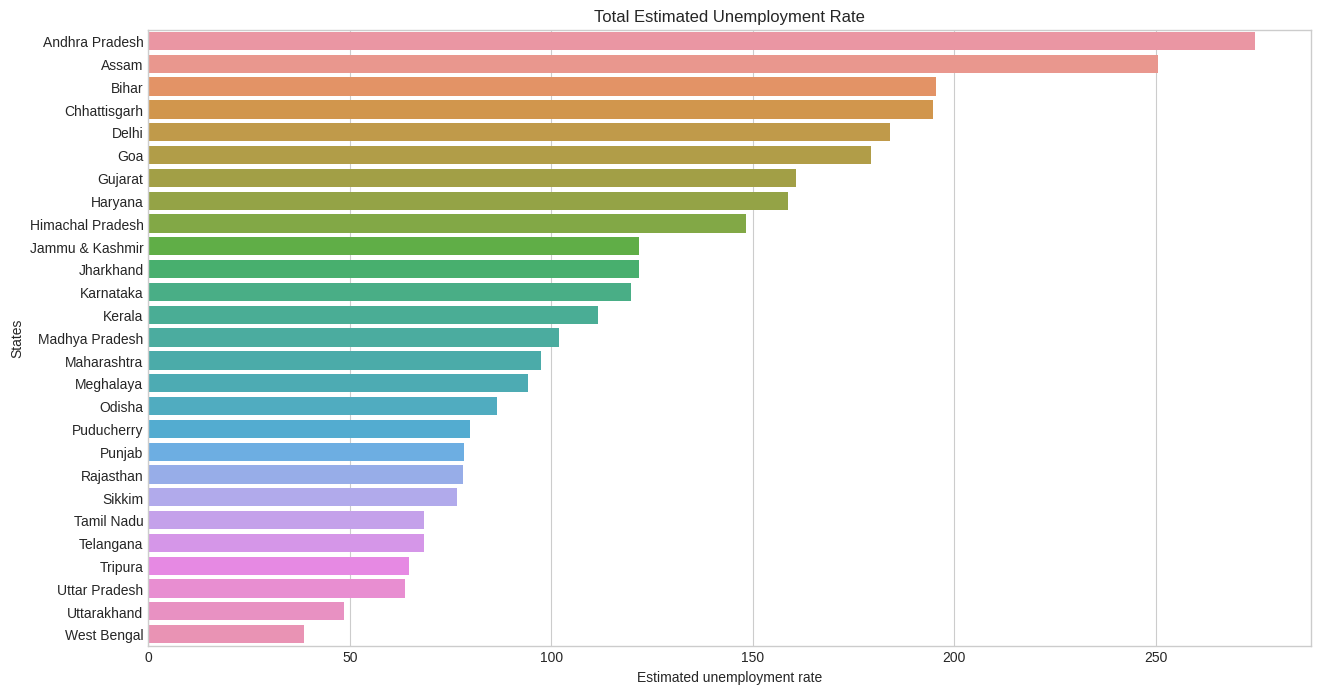

In [23]:
# Top unemployment states
plt.figure(figsize = (15,8))
plt.title("Total Estimated Unemployment Rate")
sns.barplot(data = grp_states.sort_values(by = 'Estimated unemployment rate', ascending = False), x = 'Estimated unemployment rate', y = grp_states.index)

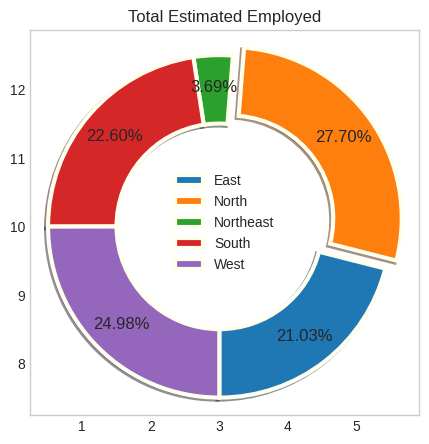

In [24]:
# Estimated employed distribution by region
plt.figure(figsize = (10,5))
plt.grid(False)
explode = [0,0.2,0,0,0]
textprops = {"fontsize":12}
wedgeprops = {"linewidth": 3, 'width':1, "edgecolor":"ivory"}
plt.pie(
        grp_region['Estimated employed'], 
        explode = explode, 
        autopct = "%0.2f%%",
        pctdistance = 0.81,
        shadow = True,
        radius = 2.5,
        startangle = 270,
        center = (3,10),
        counterclock = True,
        wedgeprops = wedgeprops,
        textprops = textprops,
        frame=True
        )
plt.title("Total Estimated Employed")
plt.legend(grp_region.index, loc = 'center');


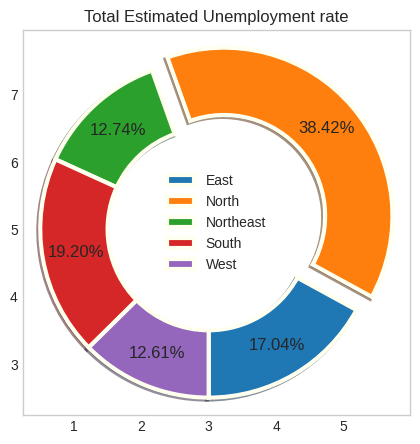

In [25]:
plt.figure(figsize = (10,5))
plt.grid(False)
explode = [0,0.3,0,0,0]
textprops = {"fontsize":12}
wedgeprops = {"linewidth": 3, 'width':1, "edgecolor":"ivory"}
plt.pie(
        grp_region['Estimated unemployment rate'],
        explode = explode, 
        autopct = "%0.2f%%",
        pctdistance = 0.80,
        shadow = True,
        radius = 2.5,
        labeldistance = .55,
        startangle = 270,
        center = (3,5),
        counterclock = True,
        wedgeprops = wedgeprops,
        textprops = textprops,
        frame=True
        )
plt.title("Total Estimated Unemployment rate")
plt.legend(grp_region.index, loc = 'center');

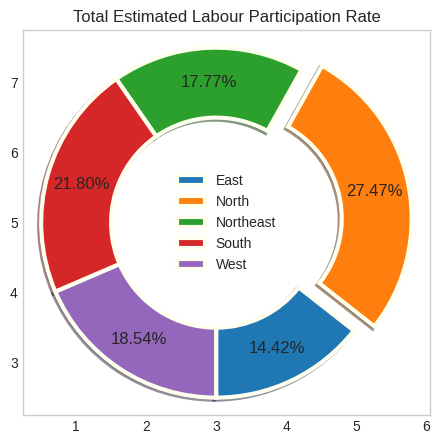

In [26]:
plt.figure(figsize = (10,5))
plt.grid(False)
explode = [0,0.3,0,0,0]
textprops = {"fontsize":12}
wedgeprops = {"linewidth": 3, 'width':1, "edgecolor":"ivory"}
plt.pie(
        grp_region['Estimated Labour Participation Rate'],
        explode = explode, 
        autopct = "%0.2f%%",
        pctdistance = 0.80,
        shadow = True,
        radius = 2.5,
        labeldistance = .55,
        startangle = 270,
        center = (3,5),
        counterclock = True,
        wedgeprops = wedgeprops,
        textprops = textprops,
        frame=True
        )
plt.title("Total Estimated Labour Participation Rate")
plt.legend(grp_region.index, loc = 'center');

In [27]:
unemployment = data[["States", "Region", "Estimated unemployment rate"]]
figure = px.sunburst(unemployment, path = ["Region", "States"], 
                     values = "Estimated unemployment rate", 
                     width = 700, height = 700, 
                     title = "Unemployment Rate in India")
figure.show()